In [ ]:
#importings the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#uploading csv
from google.colab import files

uploaded = files.upload()

Saving GOOG.csv to GOOG.csv


In [ ]:
#importing csv
import io
  
StockRecords = pd.read_csv(io.BytesIO(uploaded['GOOG.csv']),index_col="date")
print(StockRecords)

                          symbol    close  ...     open   volume
date                                       ...                  
2016-06-14 00:00:00+00:00   GOOG   718.27  ...   716.48  1306065
2016-06-15 00:00:00+00:00   GOOG   718.92  ...   719.00  1214517
2016-06-16 00:00:00+00:00   GOOG   710.36  ...   714.91  1982471
2016-06-17 00:00:00+00:00   GOOG   691.72  ...   708.65  3402357
2016-06-20 00:00:00+00:00   GOOG   693.71  ...   698.77  2082538
...                          ...      ...  ...      ...      ...
2021-06-07 00:00:00+00:00   GOOG  2466.09  ...  2451.32  1192453
2021-06-08 00:00:00+00:00   GOOG  2482.85  ...  2479.90  1253253
2021-06-09 00:00:00+00:00   GOOG  2491.40  ...  2499.50  1006337
2021-06-10 00:00:00+00:00   GOOG  2521.60  ...  2494.01  1561733
2021-06-11 00:00:00+00:00   GOOG  2513.93  ...  2524.92  1262309

[1258 rows x 6 columns]


In [ ]:
#accessing required cloumns
StockRecords=StockRecords.iloc[:,1:]

#checking first five records
StockRecords.head()

,close,high,low,open,volume
date,,,,,
2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065
2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517
2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471
2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357
2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538


In [ ]:
#checking if there is any NAN value
StockRecords.isna().any()

close     False
high      False
low       False
open      False
volume    False
dtype: bool

In [ ]:
#checking infromation about Data Frame
StockRecords.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2016-06-14 00:00:00+00:00 to 2021-06-11 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1258 non-null   float64
 1   high    1258 non-null   float64
 2   low     1258 non-null   float64
 3   open    1258 non-null   float64
 4   volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0+ KB


In [ ]:
d=StockRecords["close"]          #dependent records
i=StockRecords.iloc[:,1:4]       #independent records
i

,high,low,open
date,,,
2016-06-14 00:00:00+00:00,722.470,713.1200,716.48
2016-06-15 00:00:00+00:00,722.980,717.3100,719.00
2016-06-16 00:00:00+00:00,716.650,703.2600,714.91
2016-06-17 00:00:00+00:00,708.820,688.4515,708.65
2016-06-20 00:00:00+00:00,702.480,693.4100,698.77
...,...,...,...
2021-06-07 00:00:00+00:00,2468.000,2441.0725,2451.32
2021-06-08 00:00:00+00:00,2494.495,2468.2400,2479.90
2021-06-09 00:00:00+00:00,2505.000,2487.3300,2499.50


In [ ]:
#train,test,split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(i,d,test_size=0.10,random_state=0)

In [ ]:
x_test

,high,low,open
date,,,
2016-06-21 00:00:00+00:00,702.7700,692.0100,698.40
2018-05-31 00:00:00+00:00,1097.1900,1067.5600,1067.56
2016-08-26 00:00:00+00:00,776.0799,765.8500,769.00
2020-05-13 00:00:00+00:00,1385.4800,1328.4000,1377.05
2017-03-10 00:00:00+00:00,844.9100,839.5000,843.28
...,...,...,...
2018-07-19 00:00:00+00:00,1200.0000,1183.3200,1191.00
2020-04-21 00:00:00+00:00,1254.2700,1209.7100,1247.00
2017-03-22 00:00:00+00:00,835.5500,827.1801,831.91


In [ ]:
#importing LinearRegression library
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()      #creating object of LinearRegression
lnr.fit(x_train,y_train)    #training our model to predict closing values

slope=lnr.coef_             #slope
intercept=lnr.intercept_    #intercept

print("Slope=",slope)
print("Intercept=",intercept)


Slope= [ 0.74914258  0.80139318 -0.55064989]
Intercept= 0.8631948293200367


In [ ]:
#predicting our x_test
predicted_y=lnr.predict(x_test)
predicted_y

array([ 697.33634181, 1090.49845608,  772.5549001 , 1345.08353507,
        842.23879318,  714.52100763,  920.13703716, 1119.86597983,
       1032.37138131, 1163.5411979 , 1038.32460085, 1089.47113551,
       1517.75236692, 1031.42971818, 1137.31581507, 1757.55823601,
       1206.54477366, 1917.53281269,  775.40658753, 1758.60655532,
       1528.09199972,  773.31783542, 1202.77947335, 1064.23492316,
       1881.48747253,  834.89036618, 1287.79717977, 1335.91471231,
       1004.06177288, 1070.69493471,  799.79746505, 1563.59872589,
       1760.16735971,  777.67171201, 1256.21388213, 1237.19335186,
       1237.1526342 , 2058.76288784, 1097.97351416,  938.1048013 ,
        927.23107995, 2110.8082274 , 1377.96954844, 2044.0484966 ,
       1720.71122489,  721.40837323, 2401.42804591, 1207.27366803,
        787.19842499, 2131.42821792, 1401.53020585,  970.66549621,
       1418.08092887,  768.03760686, 1031.07263258,  981.69803309,
       1172.05253502, 1775.67264568,  787.32259262,  803.49783

In [ ]:
#importing libraries to check errors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Mean_Absolute_Error=",mean_absolute_error(y_test,predicted_y))
print("Mean_Squared_Error=",mean_squared_error(y_test,predicted_y))
print("Root_Mean_Squared_Error=",np.sqrt(mean_squared_error(y_test,predicted_y)))

Mean_Absolute_Error= 5.2519607496332945
Mean_Squared_Error= 56.593760696871676
Root_Mean_Squared_Error= 7.522882472621228


In [ ]:
#entering values to be predicted
lt=[]
for v in i.columns:
        print("Enter",v)
        record=float(input())
        lt.append(record)

user_v=np.array(lt) 
user_v=user_v.reshape(1,-1)
user_v        

Enter high
100
Enter low
2920
Enter open
3900


array([[ 100., 2920., 3900.]])

In [ ]:
#predicting closing values from our given input
print("closing price=",lnr.predict(user_v))   

closing price= [268.31099287]


Text(0, 0.5, 'Opening Values')

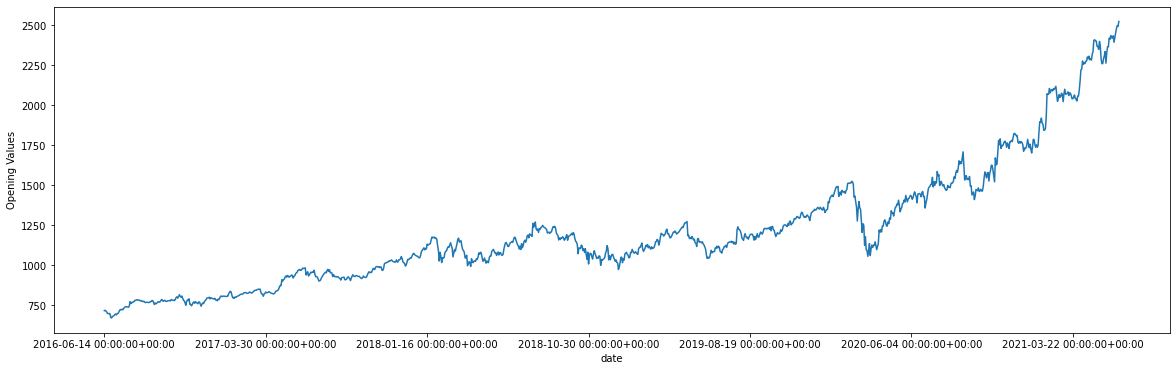

In [ ]:
StockRecords["open"].plot(figsize=(20,6))
plt.ylabel("Opening Values")

Text(0, 0.5, 'Closing Values')

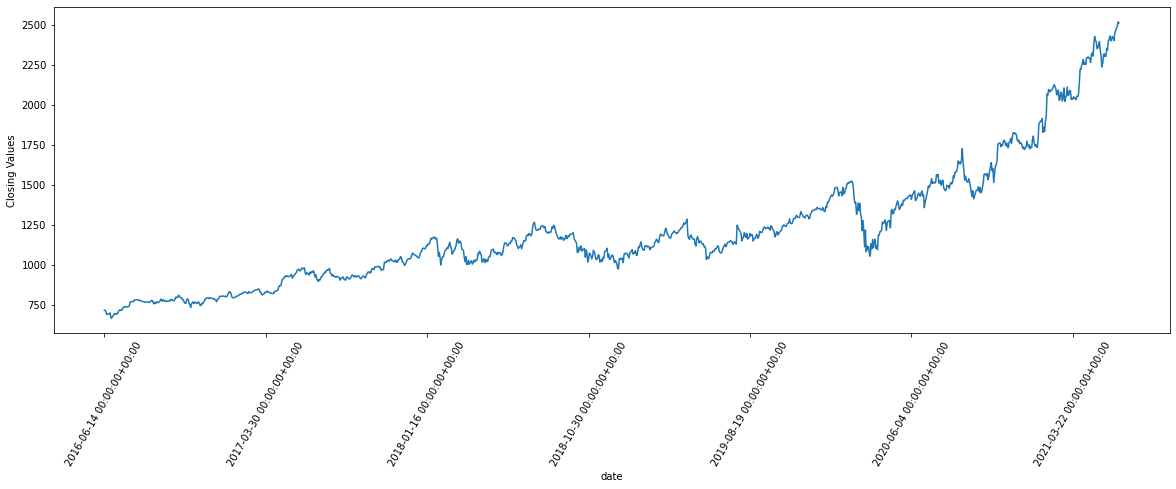

In [ ]:
from matplotlib.pyplot import figure
StockRecords["close"].plot(figsize=(20,6))
degrees = 60
plt.xticks(rotation=degrees)
plt.ylabel("Closing Values")

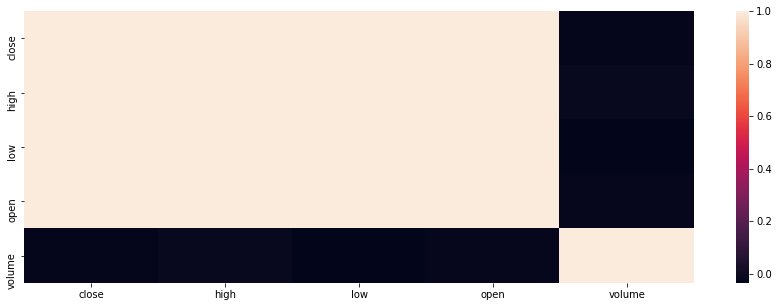

In [ ]:
import seaborn as sb
plt.figure(figsize=(15,5))
dataplot=sb.heatmap(StockRecords.corr())
plt.show()

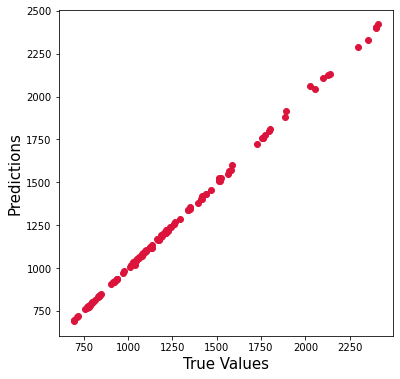

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predicted_y, c='crimson')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()

No handles with labels found to put in legend.


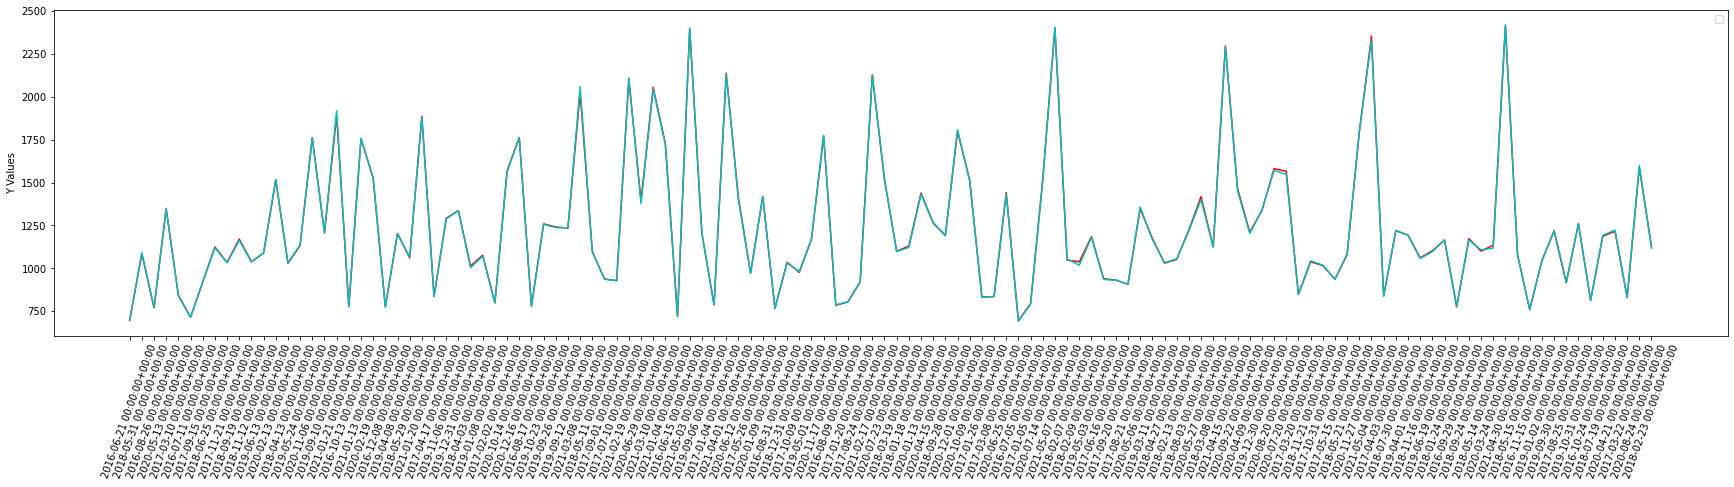

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(y_test,color="r")
plt.plot(predicted_y,color="c")
plt.ylabel("Y Values")
degrees = 70
plt.xticks(rotation=degrees)
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler      
mms = MinMaxScaler()
X_train_norm = mms.fit_transform (x_train) #fit and transform
X_test_norm = mms.transform (x_test) # only transform
print(x_train)
print(X_train_norm)
print(x_test)
print(X_test_norm)

                              high      low     open
date                                                
2017-10-20 00:00:00+00:00   991.00   984.58   989.44
2020-04-08 00:00:00+00:00  1219.07  1188.16  1206.50
2016-06-24 00:00:00+00:00   689.40   673.45   675.17
2019-05-10 00:00:00+00:00  1172.60  1142.50  1163.59
2020-12-24 00:00:00+00:00  1746.00  1729.11  1735.00
...                            ...      ...      ...
2019-06-26 00:00:00+00:00  1092.97  1072.24  1086.50
2019-10-08 00:00:00+00:00  1206.08  1189.01  1197.59
2021-04-14 00:00:00+00:00  2277.99  2249.19  2275.16
2018-08-31 00:00:00+00:00  1238.66  1211.29  1234.98
2019-03-05 00:00:00+00:00  1169.61  1146.19  1150.06

[1132 rows x 3 columns]
[[0.17183465 0.17509262 0.17176577]
 [0.29480398 0.28603503 0.28884742]
 [0.00921987 0.00554004 0.00224929]
 ...
 [0.86574576 0.86425113 0.86528006]
 [0.3053664  0.2986399  0.30420946]
 [0.26813645 0.26316317 0.25840381]]
                                high        low     open
date   

In [ ]:
#improving accuracy of model
from sklearn.metrics import r2_score
r2_score(y_test, predicted_y)

0.9996578740386984

In [ ]:
lnr = LinearRegression()
lnr.fit (X_train_norm, y_train ) 
predict_y = lnr.predict(X_test_norm)
predict_y

array([ 697.33634181, 1090.49845608,  772.5549001 , 1345.08353507,
        842.23879318,  714.52100763,  920.13703716, 1119.86597983,
       1032.37138131, 1163.5411979 , 1038.32460085, 1089.47113551,
       1517.75236692, 1031.42971818, 1137.31581507, 1757.55823601,
       1206.54477366, 1917.53281269,  775.40658753, 1758.60655532,
       1528.09199972,  773.31783542, 1202.77947335, 1064.23492316,
       1881.48747253,  834.89036618, 1287.79717977, 1335.91471231,
       1004.06177288, 1070.69493471,  799.79746505, 1563.59872589,
       1760.16735971,  777.67171201, 1256.21388213, 1237.19335186,
       1237.1526342 , 2058.76288784, 1097.97351416,  938.1048013 ,
        927.23107995, 2110.8082274 , 1377.96954844, 2044.0484966 ,
       1720.71122489,  721.40837323, 2401.42804591, 1207.27366803,
        787.19842499, 2131.42821792, 1401.53020585,  970.66549621,
       1418.08092887,  768.03760686, 1031.07263258,  981.69803309,
       1172.05253502, 1775.67264568,  787.32259262,  803.49783

In [ ]:
r2_score(y_test,predict_y)

0.9996578740386984

In [ ]:
mean_squared_error(y_test, predict_y)

56.59376069687141